In [1]:
!pip install catboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
file_path = '/content/drive/MyDrive/medellin_clima_2_anios.csv'

df = pd.read_csv(file_path)

df.head()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,p_sum,p_min,p_max,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max
0,197,2022-06-29 14:45:00,60.322667,0.593506,904.84,24.714667,0.105076,370.72,842.491333,0.065232,...,0.0,0.0,0.0,93,93,0.597520,0.006205,8.962799,0.5892,0.6065
1,197,2022-06-29 15:00:00,59.664667,1.366768,894.97,24.759333,0.070353,371.39,842.331333,0.040685,...,0.0,0.0,0.0,93,93,0.596887,0.007073,8.953300,0.5848,0.6141
2,197,2022-06-29 15:15:00,59.628000,0.709368,894.42,24.617333,0.112787,369.26,842.247333,0.075068,...,0.0,0.0,0.0,93,93,0.590020,0.006234,8.850299,0.5794,0.5984
3,197,2022-06-29 15:30:00,59.266667,0.651050,889.00,24.583333,0.106413,368.75,842.081333,0.064128,...,0.0,0.0,0.0,93,93,0.584540,0.005627,8.768099,0.5735,0.5935
4,197,2022-06-29 15:45:00,61.250000,0.883338,918.75,24.980000,0.165357,374.70,841.872000,0.065049,...,0.0,0.0,0.0,93,93,0.581833,0.004773,8.727501,0.5740,0.5913


In [5]:
grouped_df = df.sort_values(['codigo_x','fecha_hora']).reset_index(drop=True)
grouped_df.head()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,p_sum,p_min,p_max,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max
0,197,2022-06-29 14:45:00,60.322667,0.593506,904.84,24.714667,0.105076,370.72,842.491333,0.065232,...,0.0,0.0,0.0,93,93,0.597520,0.006205,8.962799,0.5892,0.6065
1,197,2022-06-29 15:00:00,59.664667,1.366768,894.97,24.759333,0.070353,371.39,842.331333,0.040685,...,0.0,0.0,0.0,93,93,0.596887,0.007073,8.953300,0.5848,0.6141
2,197,2022-06-29 15:15:00,59.628000,0.709368,894.42,24.617333,0.112787,369.26,842.247333,0.075068,...,0.0,0.0,0.0,93,93,0.590020,0.006234,8.850299,0.5794,0.5984
3,197,2022-06-29 15:30:00,59.266667,0.651050,889.00,24.583333,0.106413,368.75,842.081333,0.064128,...,0.0,0.0,0.0,93,93,0.584540,0.005627,8.768099,0.5735,0.5935
4,197,2022-06-29 15:45:00,61.250000,0.883338,918.75,24.980000,0.165357,374.70,841.872000,0.065049,...,0.0,0.0,0.0,93,93,0.581833,0.004773,8.727501,0.5740,0.5913


In [6]:
grouped_df["p_max"].value_counts()

,count
p_max,
0.000000,406704
0.254000,25694
0.508000,55
0.762000,8
1.524000,5
1.270000,3
1.016000,3
0.014111,1
0.225778,1


In [8]:
grouped_df['p_sum'].max(),grouped_df["p_sum"].min()

(9.144, 0.0)

In [9]:
value_count = df["p_sum"].value_counts()

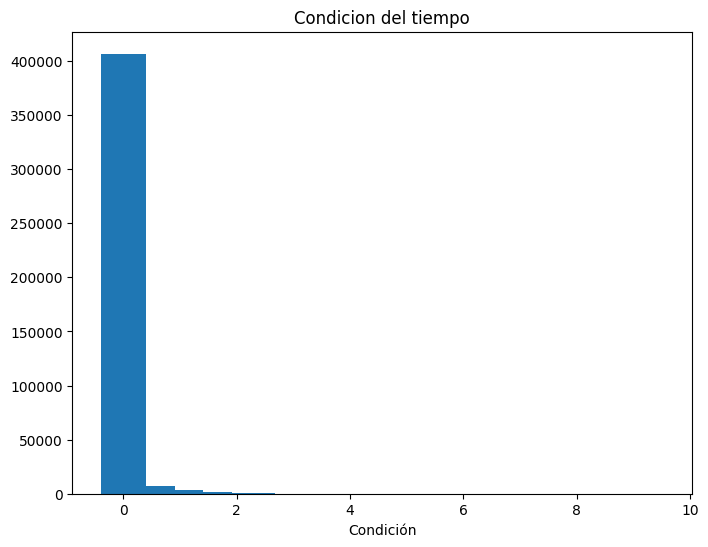

In [10]:
import matplotlib.pyplot  as plt


plt.figure(figsize=(8, 6))
plt.bar(value_count.index, value_count.values)
plt.title('Condicion del tiempo')
plt.xlabel('Condición')

plt.show()

In [11]:
value_count

,count
p_sum,
0.000000,406704
0.508000,7463
0.254000,6971
1.016000,3050
0.762000,2870
1.270000,1760
1.524000,1431
1.778000,870
2.032000,550


In [12]:
df['lluvia'] = 0
df.loc[df['p_sum'] >= 0.7, 'lluvia'] = 1
df['condicion'] = df['lluvia'].map({1: 'llueve', 0: 'no llueve'})
df.head()


,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,p_max,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion
0,197,2022-06-29 14:45:00,60.322667,0.593506,904.84,24.714667,0.105076,370.72,842.491333,0.065232,...,0.0,93,93,0.597520,0.006205,8.962799,0.5892,0.6065,0,no llueve
1,197,2022-06-29 15:00:00,59.664667,1.366768,894.97,24.759333,0.070353,371.39,842.331333,0.040685,...,0.0,93,93,0.596887,0.007073,8.953300,0.5848,0.6141,0,no llueve
2,197,2022-06-29 15:15:00,59.628000,0.709368,894.42,24.617333,0.112787,369.26,842.247333,0.075068,...,0.0,93,93,0.590020,0.006234,8.850299,0.5794,0.5984,0,no llueve
3,197,2022-06-29 15:30:00,59.266667,0.651050,889.00,24.583333,0.106413,368.75,842.081333,0.064128,...,0.0,93,93,0.584540,0.005627,8.768099,0.5735,0.5935,0,no llueve
4,197,2022-06-29 15:45:00,61.250000,0.883338,918.75,24.980000,0.165357,374.70,841.872000,0.065049,...,0.0,93,93,0.581833,0.004773,8.727501,0.5740,0.5913,0,no llueve


In [13]:
df = df.sort_values(['codigo_x','fecha_hora']).reset_index(drop=True)
df.tail()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,p_max,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion
432475,419,2024-07-19 09:30:00,71.722000,1.025749,1075.83,22.409333,0.128867,336.14,852.318000,0.031893,...,0.0,93,93,0.653427,0.002069,9.801399,0.6498,0.6565,0,no llueve
432476,419,2024-07-19 09:45:00,67.688667,1.601784,1015.33,22.920667,0.316915,343.81,852.330000,0.044078,...,0.0,93,93,0.655467,0.002047,9.832000,0.6517,0.6583,0,no llueve
432477,419,2024-07-19 10:00:00,64.669333,0.805468,970.04,23.826667,0.284119,357.40,852.110000,0.118743,...,0.0,93,93,0.657493,0.001535,9.862401,0.6549,0.6603,0,no llueve
432478,419,2024-07-19 10:15:00,62.563333,1.400019,938.45,24.600000,0.270581,369.00,851.821333,0.118011,...,0.0,93,93,0.658673,0.001965,9.880099,0.6550,0.6626,0,no llueve
432479,419,2024-07-19 10:30:00,62.754000,0.400475,313.77,24.514000,0.080808,122.57,851.702000,0.008367,...,0.0,93,93,0.661417,0.001454,3.968500,0.6596,0.6629,0,no llueve


In [14]:
df["target_t-1"] = df.groupby("codigo_x")["lluvia"].shift(-1)
df.tail()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion,target_t-1
432475,419,2024-07-19 09:30:00,71.722000,1.025749,1075.83,22.409333,0.128867,336.14,852.318000,0.031893,...,93,93,0.653427,0.002069,9.801399,0.6498,0.6565,0,no llueve,0.0
432476,419,2024-07-19 09:45:00,67.688667,1.601784,1015.33,22.920667,0.316915,343.81,852.330000,0.044078,...,93,93,0.655467,0.002047,9.832000,0.6517,0.6583,0,no llueve,0.0
432477,419,2024-07-19 10:00:00,64.669333,0.805468,970.04,23.826667,0.284119,357.40,852.110000,0.118743,...,93,93,0.657493,0.001535,9.862401,0.6549,0.6603,0,no llueve,0.0
432478,419,2024-07-19 10:15:00,62.563333,1.400019,938.45,24.600000,0.270581,369.00,851.821333,0.118011,...,93,93,0.658673,0.001965,9.880099,0.6550,0.6626,0,no llueve,0.0
432479,419,2024-07-19 10:30:00,62.754000,0.400475,313.77,24.514000,0.080808,122.57,851.702000,0.008367,...,93,93,0.661417,0.001454,3.968500,0.6596,0.6629,0,no llueve,NaN


In [15]:
df[df["target_t-1"].isna()]

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion,target_t-1
72079,197,2024-07-19 10:30:00,63.346,1.442889,316.73,24.080,0.198116,120.40,844.928,0.160997,...,93,93,0.661417,0.001454,3.9685,0.6596,0.6629,0,no llueve,NaN
144159,202,2024-07-19 10:30:00,52.080,0.653452,260.40,24.680,0.238747,123.40,853.000,0.000000,...,93,93,0.661417,0.001454,3.9685,0.6596,0.6629,0,no llueve,NaN
216239,207,2024-07-19 10:30:00,60.580,0.626099,302.90,18.000,0.000000,90.00,769.140,0.054772,...,93,93,0.661417,0.001454,3.9685,0.6596,0.6629,0,no llueve,NaN
288319,249,2024-07-19 10:30:00,67.118,0.738526,335.59,22.494,0.082946,112.47,823.100,0.000000,...,93,93,0.661417,0.001454,3.9685,0.6596,0.6629,0,no llueve,NaN
360399,355,2024-07-19 10:30:00,72.948,0.528271,364.74,16.854,0.086487,84.27,749.998,0.004472,...,93,93,0.661417,0.001454,3.9685,0.6596,0.6629,0,no llueve,NaN
432479,419,2024-07-19 10:30:00,62.754,0.400475,313.77,24.514,0.080808,122.57,851.702,0.008367,...,93,93,0.661417,0.001454,3.9685,0.6596,0.6629,0,no llueve,NaN


In [16]:
#data = #df[['condicion', 'target_t-1', 'h_promedio', 'pr_promedio', 't_promedio', 'vv_promedio']]
data =df.copy()
data = data.dropna()
data.tail()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion,target_t-1
432474,419,2024-07-19 09:15:00,74.658667,1.559257,1119.88,21.790000,0.209932,326.85,852.426000,0.041884,...,93,93,0.653047,0.001593,9.795699,0.6503,0.6562,0,no llueve,0.0
432475,419,2024-07-19 09:30:00,71.722000,1.025749,1075.83,22.409333,0.128867,336.14,852.318000,0.031893,...,93,93,0.653427,0.002069,9.801399,0.6498,0.6565,0,no llueve,0.0
432476,419,2024-07-19 09:45:00,67.688667,1.601784,1015.33,22.920667,0.316915,343.81,852.330000,0.044078,...,93,93,0.655467,0.002047,9.832000,0.6517,0.6583,0,no llueve,0.0
432477,419,2024-07-19 10:00:00,64.669333,0.805468,970.04,23.826667,0.284119,357.40,852.110000,0.118743,...,93,93,0.657493,0.001535,9.862401,0.6549,0.6603,0,no llueve,0.0
432478,419,2024-07-19 10:15:00,62.563333,1.400019,938.45,24.600000,0.270581,369.00,851.821333,0.118011,...,93,93,0.658673,0.001965,9.880099,0.6550,0.6626,0,no llueve,0.0


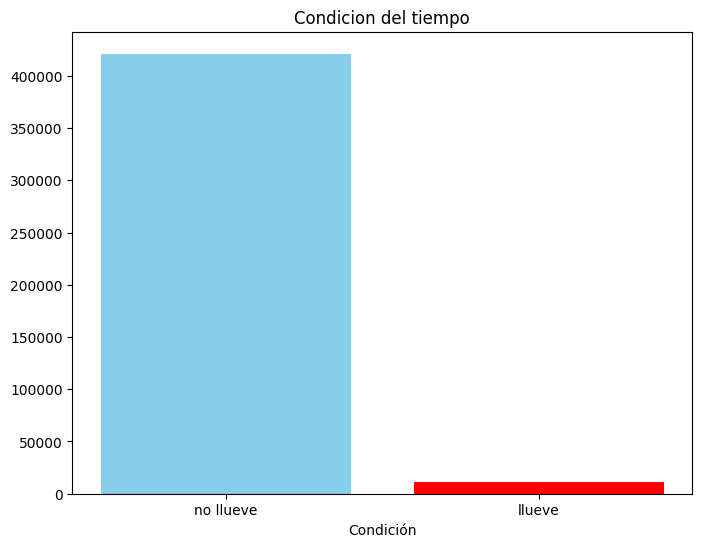

In [17]:
lluvia_counts = data['condicion'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(lluvia_counts.index, lluvia_counts.values, color=['skyblue', 'red'])
plt.title('Condicion del tiempo')
plt.xlabel('Condición')

plt.show()

In [18]:
# smote
lluvia_counts

,count
condicion,
no llueve,421140
llueve,11334


condicion
llueve       11334
no llueve    11334
Name: count, dtype: int64


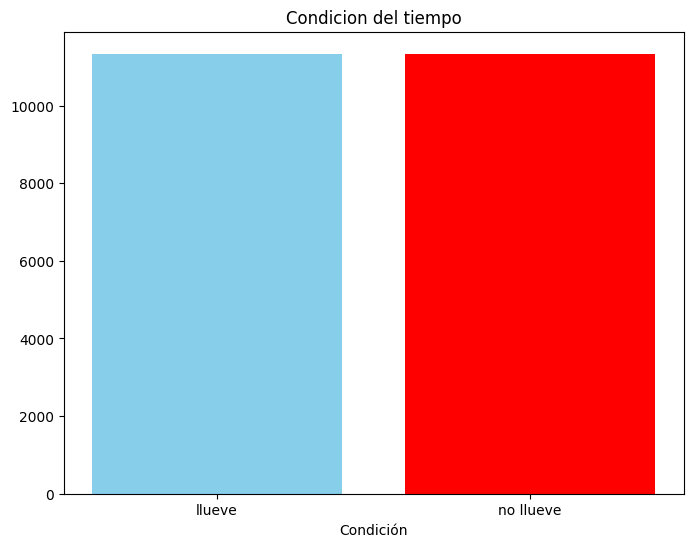

In [19]:
minority_class_size = lluvia_counts.min()

data_balanced = pd.concat([
    data[data['condicion'] == 'llueve'].sample(n=minority_class_size, random_state=42),
    data[data['condicion'] == 'no llueve'].sample(n=minority_class_size, random_state=42)
])

balanced_lluvia_counts = data_balanced['condicion'].value_counts()
print(balanced_lluvia_counts)

plt.figure(figsize=(8, 6))
plt.bar(balanced_lluvia_counts.index, balanced_lluvia_counts.values, color=['skyblue', 'red'])
plt.title('Condicion del tiempo')
plt.xlabel('Condición')
plt.show()


In [20]:
data_balanced = data_balanced.sort_values(by=["fecha_hora"])
data_balanced.tail()

,codigo_x,fecha_hora,h_promedio,h_std,h_sum,t_promedio,t_std,t_sum,pr_promedio,pr_std,...,codigo_mapeado_2,codigo,nivel_metros_promedio,nivel_metros_std,nivel_metros_sum,nivel_metros_min,nivel_metros_max,lluvia,condicion,target_t-1
72015,197,2024-07-18 18:30:00,68.274000,0.507512,1024.11,24.752667,0.098812,371.29,843.460667,0.114359,...,93,93,0.656560,0.001641,9.848400,0.6542,0.6589,0,no llueve,0.0
216199,207,2024-07-19 00:30:00,88.616667,0.744184,1329.25,11.859333,0.525975,177.89,768.638000,0.086784,...,93,93,0.624220,0.001913,9.363300,0.6195,0.6273,0,no llueve,0.0
360390,355,2024-07-19 08:15:00,75.791333,1.800031,1136.87,16.328667,0.234943,244.93,749.762667,0.047879,...,93,93,0.651340,0.001862,9.770101,0.6476,0.6539,0,no llueve,0.0
72071,197,2024-07-19 08:30:00,74.129333,0.276960,1111.94,21.736667,0.138237,326.05,847.458667,0.065994,...,93,93,0.651493,0.001966,9.772399,0.6490,0.6560,0,no llueve,0.0
144152,202,2024-07-19 08:45:00,69.173333,0.689168,1037.60,21.860000,0.112122,327.90,853.660000,0.050709,...,93,93,0.651287,0.001789,9.769299,0.6488,0.6548,0,no llueve,0.0


In [21]:
data_balanced.columns

Index(['codigo_x', 'fecha_hora', 'h_promedio', 'h_std', 'h_sum', 't_promedio',
       't_std', 't_sum', 'pr_promedio', 'pr_std', 'pr_sum', 'vv_promedio',
       'vv_std', 'vv_sum', 'vv_max_promedio', 'vv_max_std', 'vv_max_sum',
       'codigo_mapeado', 'codigo_y', 'p_promedio', 'p_std', 'p_sum', 'p_min',
       'p_max', 'codigo_mapeado_2', 'codigo', 'nivel_metros_promedio',
       'nivel_metros_std', 'nivel_metros_sum', 'nivel_metros_min',
       'nivel_metros_max', 'lluvia', 'condicion', 'target_t-1'],
      dtype='object')

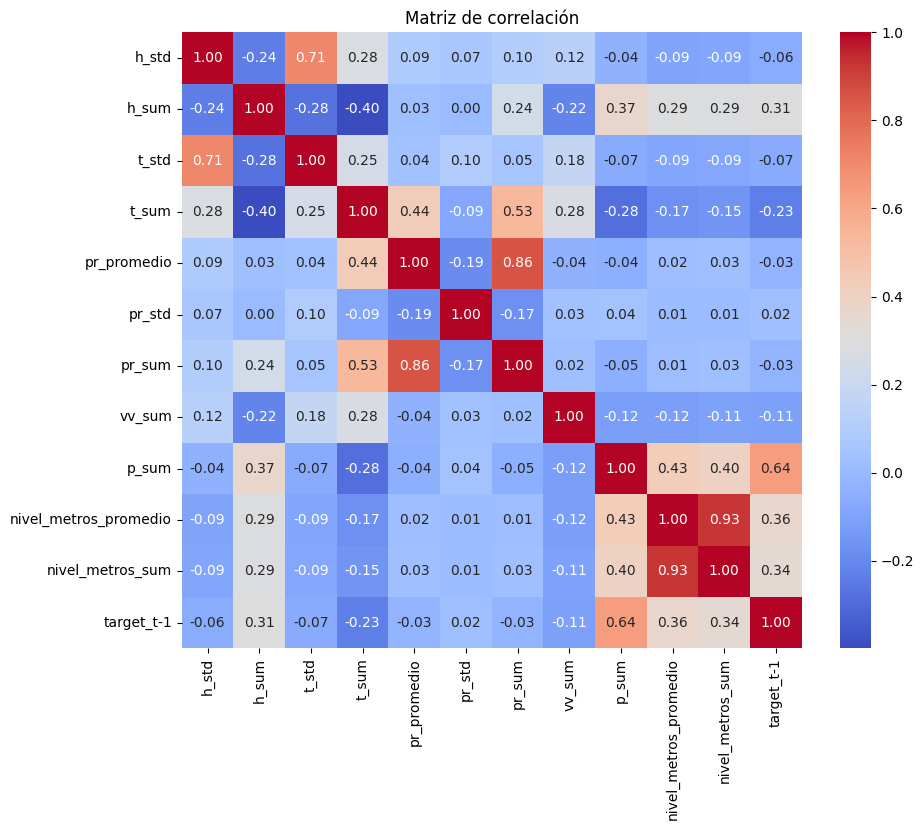

In [22]:
correlation_matrix = data_balanced[[ 'h_std', 'h_sum',
       't_std', 't_sum', 'pr_promedio', 'pr_std', 'pr_sum', 'vv_sum','p_sum', 'nivel_metros_promedio','nivel_metros_sum', 'target_t-1']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()
# nivrle de metros

In [23]:
X = data_balanced[[ 'h_std', 'h_sum',
       't_std', 't_sum', 'pr_promedio', 'pr_std', 'pr_sum', 'vv_sum','p_sum']]
y = data_balanced['target_t-1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      3184
         1.0       0.65      0.71      0.68      1350

    accuracy                           0.80      4534
   macro avg       0.76      0.77      0.77      4534
weighted avg       0.80      0.80      0.80      4534

Confusion Matrix:
 [[2670  514]
 [ 397  953]]


In [24]:
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=10)
catboost_classifier.fit(X_train, y_train)

y_pred_catboost = catboost_classifier.predict(X_test)

print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))
print("CatBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

0:	learn: 0.6427220	total: 59.1ms	remaining: 5.85s
10:	learn: 0.4205223	total: 168ms	remaining: 1.36s
20:	learn: 0.3609847	total: 279ms	remaining: 1.05s
30:	learn: 0.3416450	total: 337ms	remaining: 751ms
40:	learn: 0.3349361	total: 414ms	remaining: 596ms
50:	learn: 0.3306153	total: 511ms	remaining: 491ms
60:	learn: 0.3284517	total: 625ms	remaining: 399ms
70:	learn: 0.3263311	total: 737ms	remaining: 301ms
80:	learn: 0.3248143	total: 809ms	remaining: 190ms
90:	learn: 0.3236228	total: 921ms	remaining: 91.1ms
99:	learn: 0.3222162	total: 1.02s	remaining: 0us
CatBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      3184
         1.0       0.67      0.73      0.70      1350

    accuracy                           0.81      4534
   macro avg       0.78      0.79      0.78      4534
weighted avg       0.82      0.81      0.81      4534

CatBoost Confusion Matrix:
 [[2701  483]
 [ 367  983]]


h_std: 2.0902294110277504
h_sum: 7.197284441854475
t_std: 2.8961053892980324
t_sum: 4.061867827149757
pr_promedio: 2.0946990479114964
pr_std: 2.291644291605133
pr_sum: 1.6228258105936788
vv_sum: 1.9982779715837742
p_sum: 75.74706580897593


<ipython-input-25-8ef685c40e26>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


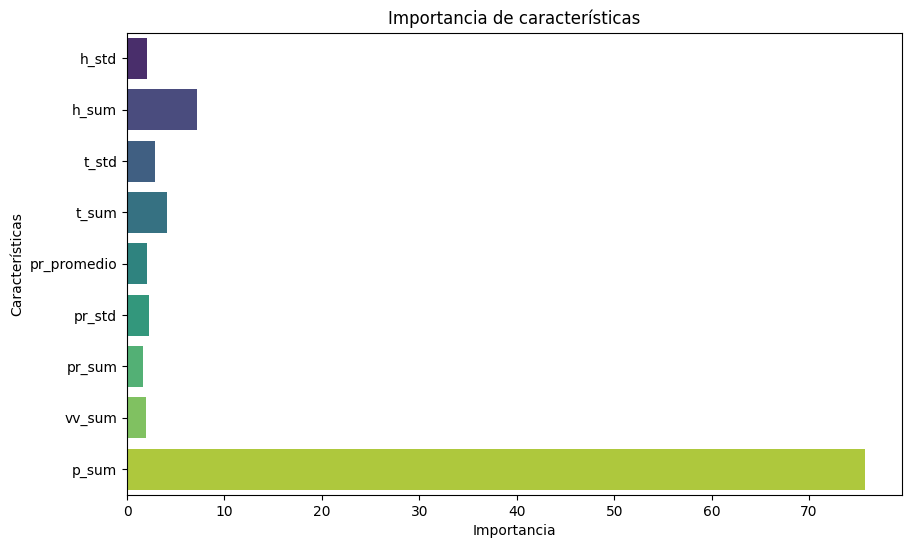

In [25]:
feature_importances = catboost_classifier.get_feature_importance()
feature_names = X.columns


for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title("Importancia de características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

In [26]:
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      3184
         1.0       0.65      0.62      0.64      1350

    accuracy                           0.79      4534
   macro avg       0.75      0.74      0.74      4534
weighted avg       0.78      0.79      0.79      4534

Logistic Regression Confusion Matrix:
 [[2731  453]
 [ 511  839]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


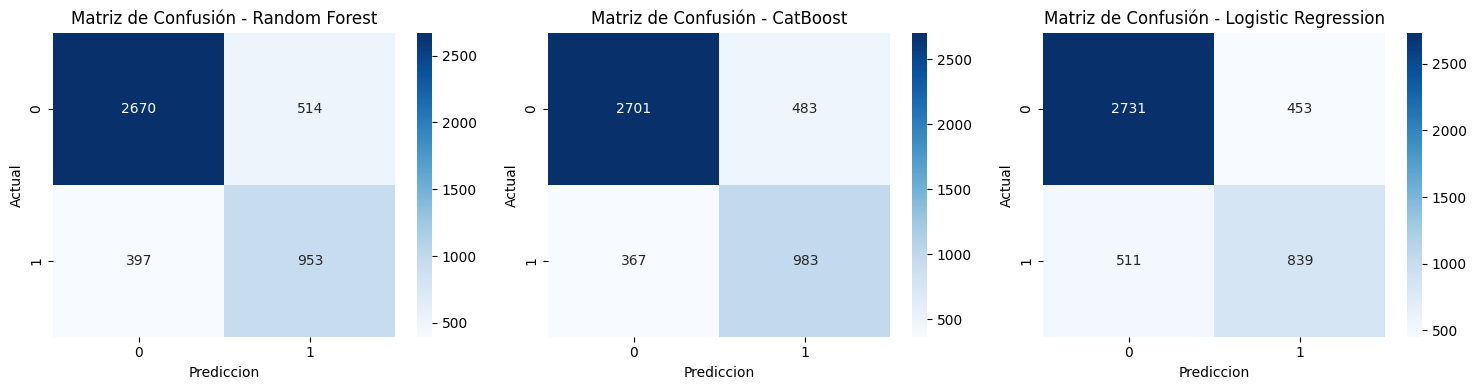

In [27]:
def plot_confusion_matrices(models, y_test, y_preds, model_names):
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 4))

    for i, model in enumerate(models):
        cm = confusion_matrix(y_test, y_preds[i])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
        axes[i].set_title(f"Matriz de Confusión - {model_names[i]}")
        axes[i].set_xlabel("Prediccion")
        axes[i].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

models = [rf_classifier, catboost_classifier, logreg_classifier]
y_preds = [y_pred, y_pred_catboost, y_pred_logreg]
model_names = ["Random Forest", "CatBoost", "Logistic Regression"]

plot_confusion_matrices(models, y_test, y_preds, model_names)

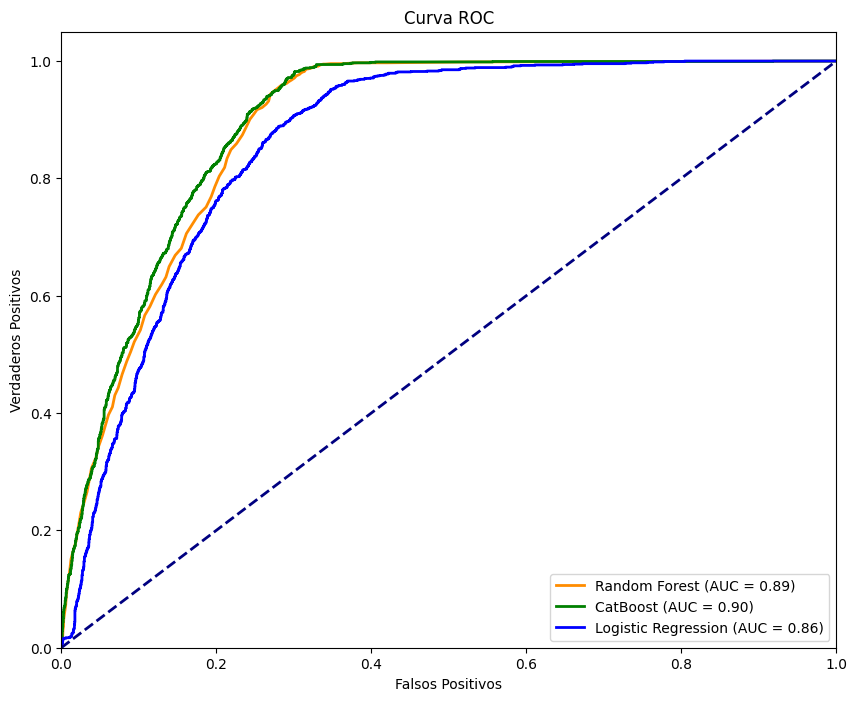

In [28]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, catboost_classifier.predict_proba(X_test)[:, 1])
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_classifier.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label='CatBoost (AUC = %0.2f)' % roc_auc_catboost)
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Dividir el conjunto de entrenamiento+validación en entrenamiento (70%) y validación (30%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.3, stratify=y_train_val, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(random_state=42, max_iter=500)
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Validación cruzada para ajustar los modelos en el conjunto de entrenamiento
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para Random Forest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='roc_auc')
print("Random Forest - Mean AUC (Validation):", rf_scores.mean())
print("Random Forest - AUC Std Dev (Validation):", rf_scores.std())

# Validación cruzada para Logistic Regression
logreg_scores = cross_val_score(logreg_model, X_train, y_train, cv=cv, scoring='roc_auc')
print("Logistic Regression - Mean AUC (Validation):", logreg_scores.mean())
print("Logistic Regression - AUC Std Dev (Validation):", logreg_scores.std())

# Validación cruzada para CatBoost
catboost_scores = cross_val_score(catboost_model, X_train, y_train, cv=cv, scoring='roc_auc')
print("CatBoost - Mean AUC (Validation):", catboost_scores.mean())
print("CatBoost - AUC Std Dev (Validation):", catboost_scores.std())


rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)


rf_y_val_pred = rf_model.predict(X_val)
logreg_y_val_pred = logreg_model.predict(X_val)
catboost_y_val_pred = catboost_model.predict(X_val)


print("\nRandom Forest - Validation Set Metrics")
print(classification_report(y_val, rf_y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_y_val_pred))

print("\nLogistic Regression - Validation Set Metrics")
print(classification_report(y_val, logreg_y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, logreg_y_val_pred))

print("\nCatBoost - Validation Set Metrics")
print(classification_report(y_val, catboost_y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, catboost_y_val_pred))


rf_y_test_pred = rf_model.predict(X_test)
logreg_y_test_pred = logreg_model.predict(X_test)
catboost_y_test_pred = catboost_model.predict(X_test)

print("\nRandom Forest - Test Set Metrics")
print(classification_report(y_test, rf_y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_test_pred))

print("\nLogistic Regression - Test Set Metrics")
print(classification_report(y_test, logreg_y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_y_test_pred))

print("\nCatBoost - Test Set Metrics")
print(classification_report(y_test, catboost_y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, catboost_y_test_pred))


Random Forest - Mean AUC (Validation): 0.8936402689078481
Random Forest - AUC Std Dev (Validation): 0.004229755601164814


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression - Mean AUC (Validation): 0.8963088163370916
Logistic Regression - AUC Std Dev (Validation): 0.004980237670311091
CatBoost - Mean AUC (Validation): 0.9018339737205927
CatBoost - AUC Std Dev (Validation): 0.0050231953476394175


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest - Validation Set Metrics
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      3829
         1.0       0.66      0.71      0.68      1612

    accuracy                           0.81      5441
   macro avg       0.77      0.78      0.77      5441
weighted avg       0.81      0.81      0.81      5441

Confusion Matrix:
 [[3235  594]
 [ 463 1149]]

Logistic Regression - Validation Set Metrics
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      3829
         1.0       0.71      0.61      0.66      1612

    accuracy                           0.81      5441
   macro avg       0.78      0.75      0.76      5441
weighted avg       0.80      0.81      0.81      5441

Confusion Matrix:
 [[3422  407]
 [ 625  987]]

CatBoost - Validation Set Metrics
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      3829
         1.0       0.68 